In [2]:
import json
import os
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

#### 💾 Importar as metricas de todos os modelos

In [3]:
paths = glob("../predicts/*/metrics.json") # 1) Encontra todos os ficheiros metrics.json dentro de subpastas de ./predicts/

records = []
for path in paths:
    model_name = os.path.basename(os.path.dirname(path)) # Extrai o nome do modelo a partir do nome da pasta onde está o ficheiro

    # Abre e lê o ficheiro JSON que contém as métricas do modelo
    with open(path, "r", encoding="utf-8") as f:
        metrics = json.load(f)

    metrics["model"] = model_name # Adiciona o nome do modelo ao dicionário de métricas
    records.append(metrics) # Guarda o dicionário na lista de registos

# 2) Constrói um DataFrame com todas as métricas de todos os modelos
df_metrics = pd.DataFrame(records).set_index("model")

# Seleciona apenas as colunas desejadas para exibição
cols = ["MAE", "MSE", "RMSE", "MAPE", "R²"]
df_metrics = df_metrics[cols]

print(df_metrics) # 3) Mostra a tabela com as métricas de cada modelo

                  MAE       MSE      RMSE       MAPE         R²
model                                                          
ARIMA        0.024986  0.000972  0.031170  47.821590 -15.008978
ARIMA_lag    0.024986  0.000972  0.031170  47.821590 -15.008978
AutoML       0.001345  0.000006  0.002526   3.199281   0.894867
AutoML_lag   0.001314  0.000006  0.002473   3.153616   0.899208
CNN          0.003369  0.000019  0.004376   7.553213   0.561536
CNN_lag      0.002469  0.000015  0.003908   5.729642   0.748327
LSTM         0.002101  0.000010  0.003138   4.638034   0.837705
LSTM_lag     0.001639  0.000009  0.002975   3.937088   0.854123
NARX         0.001567  0.000006  0.002533   3.644730   0.894284
NARX_lag     0.002954  0.000013  0.003548   6.299573   0.792585
RF           0.003369  0.000019  0.004376   7.553213   0.684524
RF_lag       0.003400  0.000016  0.003997   6.949839   0.736799
XGBoost      0.003369  0.000019  0.004376   7.553213   0.804461
XGBoost_lag  0.002954  0.000013  0.00354

# 📊 MAE

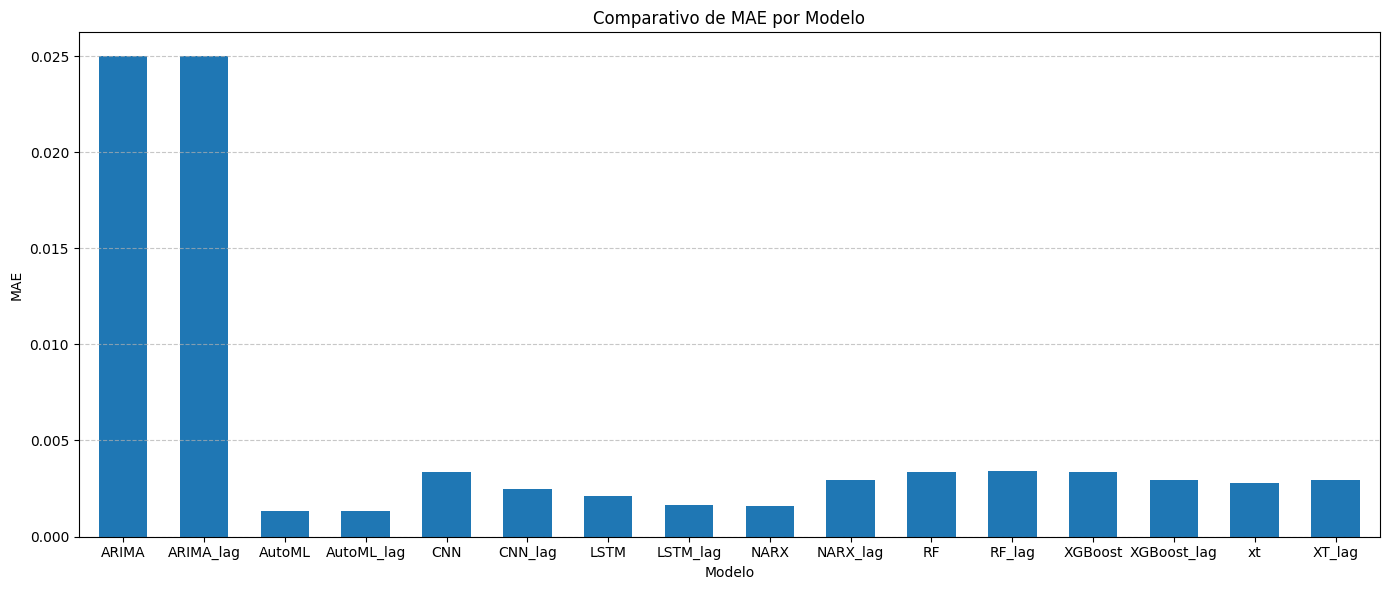

In [4]:
plt.figure(figsize=(14, 6)) # Cria uma nova figura para o gráfico com tamanho 14x6 polegadas

# Plota um gráfico de barras com os valores de MAE por modelo
df_metrics['MAE'].plot(
    kind="bar",   # Tipo de gráfico: barras
    rot=0,        # Rotação dos nomes dos modelos no eixo x (0 = horizontal)
    width=0.6     # Largura das barras
)

plt.title(f"Comparativo de MAE por Modelo") # Define o título do gráfico
plt.xlabel("Modelo") # Define o rótulo do eixo X
plt.ylabel("MAE") # Define o rótulo do eixo Y
plt.grid(axis="y", linestyle="--", alpha=0.7) # Adiciona uma grelha no eixo Y com estilo tracejado e opacidade de 70%
plt.tight_layout() # Ajusta o layout para evitar sobreposição de elementos
plt.show() # Exibe o gráfico

### ✅ Conclusão:

Este gráfico demonstra de forma clara que:

* Modelos modernos baseados em redes neuronais (LSTM), ensembles automáticos (AutoML), e árvores de decisão com lags explícitos são muito mais eficazes que abordagens tradicionais como ARIMA.
* A introdução de **lags sazonais (como o lag\_168)** e **variáveis temporais** melhora substancialmente o desempenho preditivo da maioria dos modelos.
* O **AutoML\_lag** e o **LSTM\_lag** são os candidatos mais promissores para aplicações reais que exigem alta precisão na previsão horária de consumo energético.

# 📊 MSE

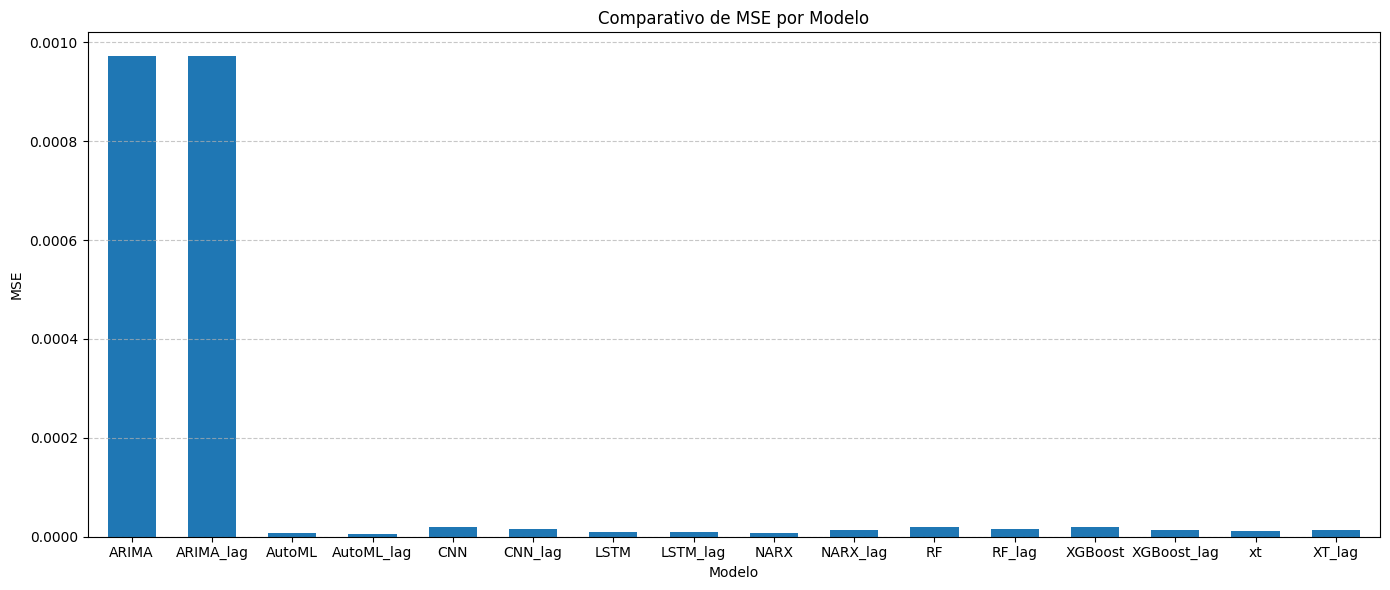

In [5]:
plt.figure(figsize=(14, 6)) # Cria uma nova figura para o gráfico com tamanho 14x6 polegadas

# Plota um gráfico de barras com os valores de MSE por modelo
df_metrics['MSE'].plot(
    kind="bar",   # Tipo de gráfico: barras
    rot=0,        # Rotação dos nomes dos modelos no eixo x (0 = horizontal)
    width=0.6     # Largura das barras
)

plt.title(f"Comparativo de MSE por Modelo") # Define o título do gráfico
plt.xlabel("Modelo") # Define o rótulo do eixo X
plt.ylabel("MSE") # Define o rótulo do eixo Y
plt.grid(axis="y", linestyle="--", alpha=0.7) # Adiciona uma grelha no eixo Y com estilo tracejado e opacidade de 70%
plt.tight_layout() # Ajusta o layout para evitar sobreposição de elementos
plt.show() # Exibe o gráfico

### ✅ Conclusão:

O gráfico confirma que:

* **ARIMA é inadequado** para esta tarefa, pois tem MSE dezenas de vezes superior aos restantes.
* Modelos como **AutoML\_lag** e **LSTM\_lag** produzem previsões **altamente precisas e estáveis**, com MSEs praticamente nulos.
* A utilização de **lags sazonais (como lag\_168)** melhora claramente a qualidade dos modelos em termos de erro quadrático médio.

# 📊 RMSE

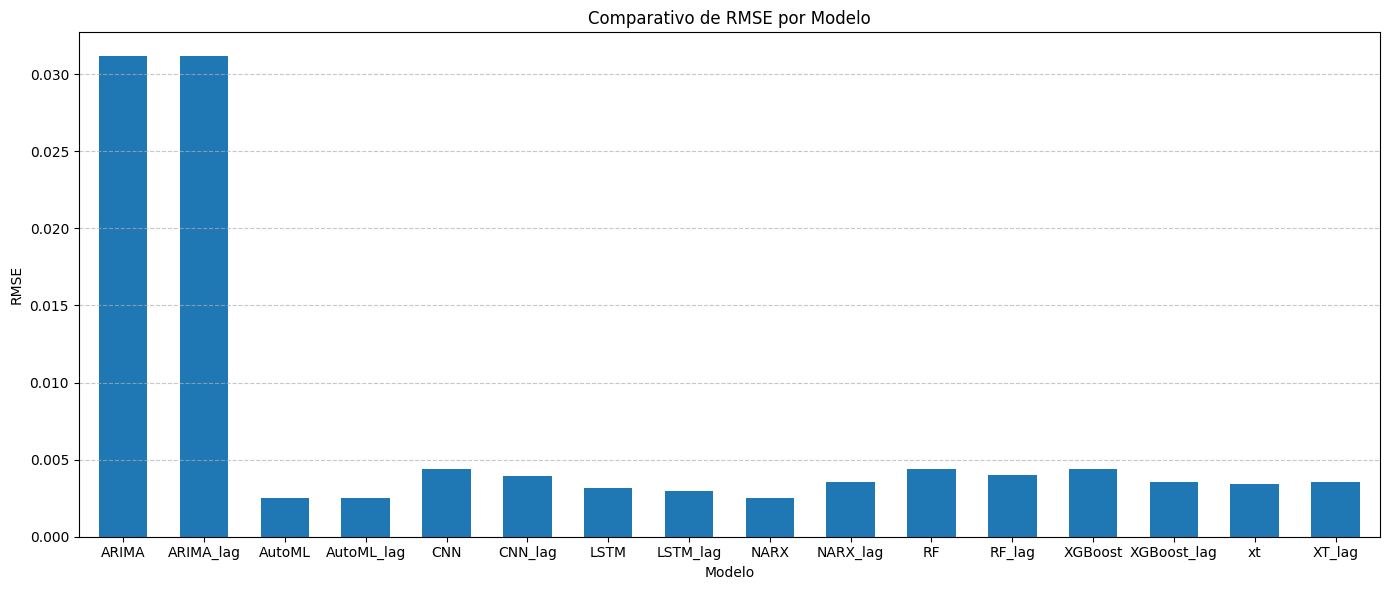

In [6]:
plt.figure(figsize=(14, 6)) # Cria uma nova figura para o gráfico com tamanho 14x6 polegadas

# Plota um gráfico de barras com os valores de RMSE por modelo
df_metrics['RMSE'].plot(
    kind="bar",   # Tipo de gráfico: barras
    rot=0,        # Rotação dos nomes dos modelos no eixo x (0 = horizontal)
    width=0.6     # Largura das barras
)

plt.title(f"Comparativo de RMSE por Modelo") # Define o título do gráfico
plt.xlabel("Modelo") # Define o rótulo do eixo X
plt.ylabel("RMSE") # Define o rótulo do eixo Y
plt.grid(axis="y", linestyle="--", alpha=0.7) # Adiciona uma grelha no eixo Y com estilo tracejado e opacidade de 70%
plt.tight_layout() # Ajusta o layout para evitar sobreposição de elementos
plt.show() # Exibe o gráfico

### ✅ Conclusão:

O gráfico evidencia que:

* O **AutoML com lag** é o modelo com **melhor ajuste geral (menor RMSE)**.
* O uso de **lags temporais (lag\_168)** melhora substancialmente a precisão dos modelos.
* O **ARIMA** continua a ser **o modelo mais impreciso**, mesmo com o uso de lag.
* Modelos baseados em **Deep Learning (LSTM)** e **ensembles automáticos (AutoML)** são as melhores opções para este tipo de série temporal horária.

# 📊 MAPE

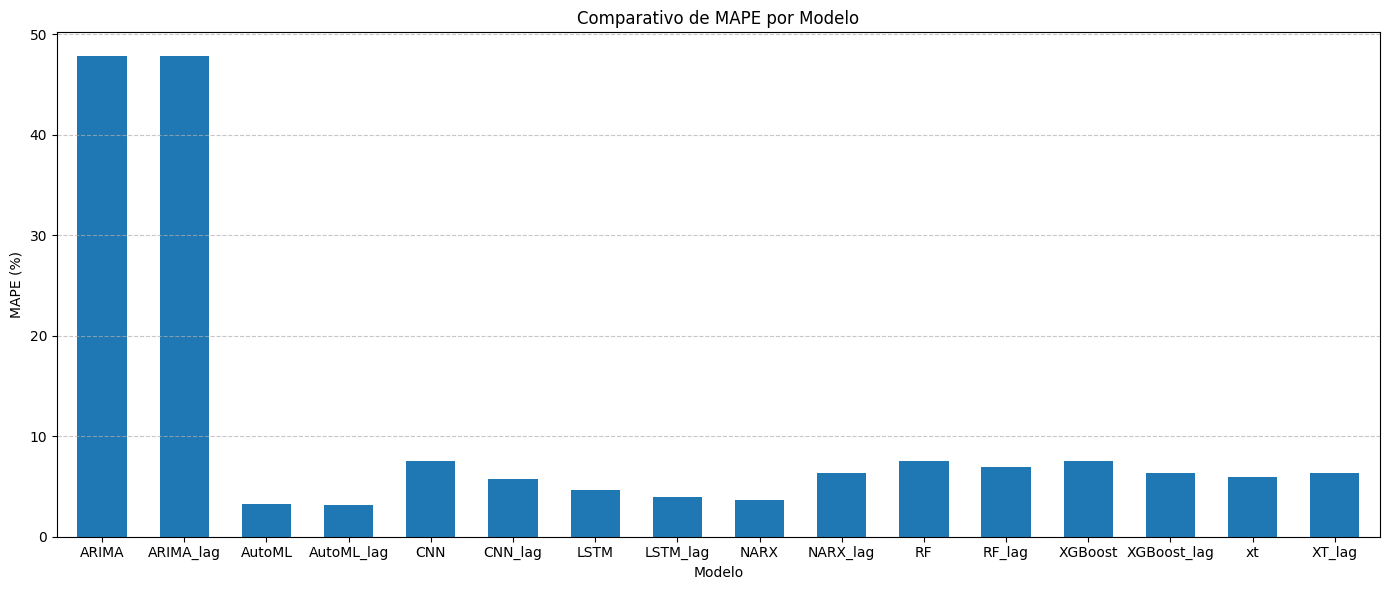

In [7]:
plt.figure(figsize=(14, 6)) # Cria uma nova figura para o gráfico com tamanho 14x6 polegadas

# Plota um gráfico de barras com os valores de MAPE' por modelo
df_metrics['MAPE'].plot(
    kind="bar",   # Tipo de gráfico: barras
    rot=0,        # Rotação dos nomes dos modelos no eixo x (0 = horizontal)
    width=0.6     # Largura das barras
)

plt.title(f"Comparativo de MAPE por Modelo") # Define o título do gráfico
plt.xlabel("Modelo") # Define o rótulo do eixo X
plt.ylabel("MAPE (%)") # Define o rótulo do eixo Y
plt.grid(axis="y", linestyle="--", alpha=0.7) # Adiciona uma grelha no eixo Y com estilo tracejado e opacidade de 70%
plt.tight_layout() # Ajusta o layout para evitar sobreposição de elementos
plt.show() # Exibe o gráfico

### ✅ Conclusão:

O gráfico deixa claro que:

* O **MAPE penaliza fortemente os modelos com grandes desvios relativos**, como o ARIMA.
* Modelos como **AutoML\_lag**, **LSTM\_lag** e **NARX** são os **mais confiáveis** para previsão de consumo energético, com erros relativos baixos e desempenho consistente.
* A combinação de **ensembles automáticos**, **deep learning** e **lags sazonais** oferece os melhores resultados.

# 📊 R²

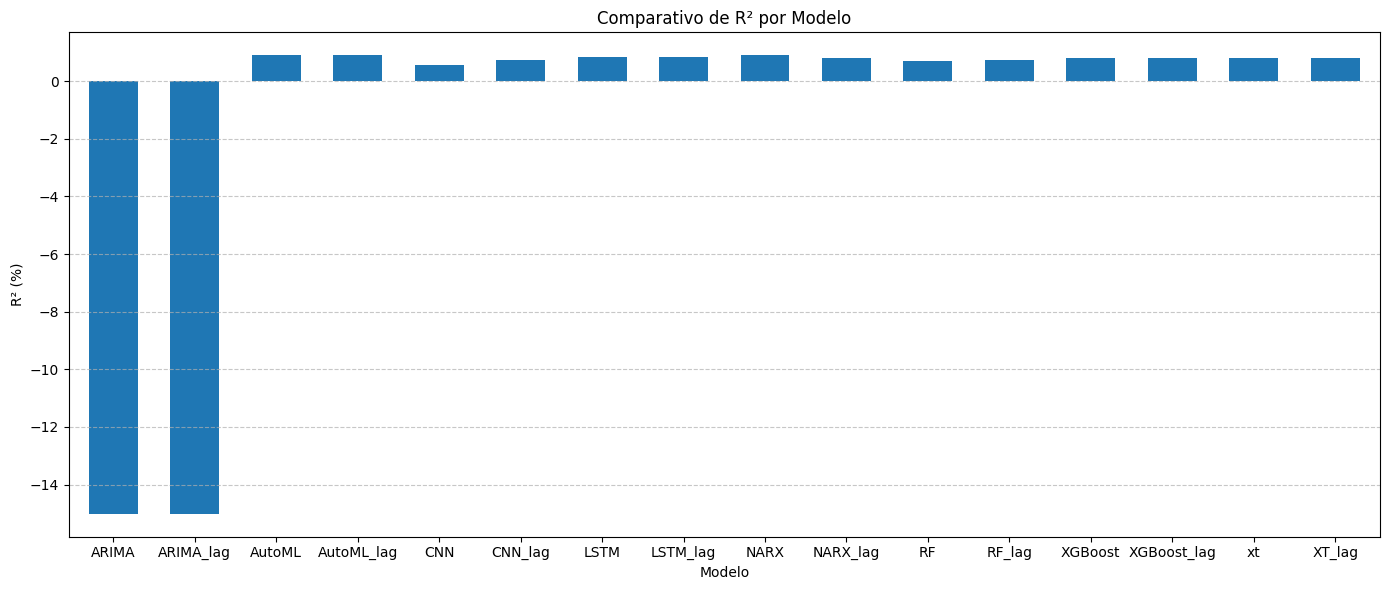

In [8]:
plt.figure(figsize=(14, 6)) # Cria uma nova figura para o gráfico com tamanho 14x6 polegadas

# Plota um gráfico de barras com os valores de R² por modelo
df_metrics['R²'].plot(
    kind="bar",   # Tipo de gráfico: barras
    rot=0,        # Rotação dos nomes dos modelos no eixo x (0 = horizontal)
    width=0.6     # Largura das barras
)

plt.title(f"Comparativo de R² por Modelo") # Define o título do gráfico
plt.xlabel("Modelo") # Define o rótulo do eixo X
plt.ylabel("R² (%)") # Define o rótulo do eixo Y
plt.grid(axis="y", linestyle="--", alpha=0.7) # Adiciona uma grelha no eixo Y com estilo tracejado e opacidade de 70%
plt.tight_layout() # Ajusta o layout para evitar sobreposição de elementos
plt.show() # Exibe o gráfico

### ✅ Conclusão:

O coeficiente de determinação R² é uma das métricas mais úteis para avaliar a **capacidade explicativa dos modelos**, e aqui ele demonstra que:

* **Modelos tradicionais como ARIMA não são recomendados** neste cenário.
* **Modelos de deep learning (LSTM), ensembles automáticos (AutoML)** e **árvores com variáveis temporais (XGBoost, Extra Trees)** conseguem prever com bastante precisão.
* O **AutoML\_lag** é o **modelo com melhor ajuste geral**, seguido de perto por LSTM\_lag e NARX.

---

Com base na comparação global entre os modelos de previsão aplicados ao consumo energético normalizado hora a hora do dia 30/09/2023 (código postal 4610), observa-se uma clara distinção de desempenho entre abordagens tradicionais e modelos modernos baseados em machine learning e deep learning. O **ARIMA**, com ou sem lag, apresentou desempenho significativamente inferior em todas as métricas — **MAE e RMSE elevadíssimos**, **MAPE superior a 47%** e **R² negativo**, revelando-se ineficaz neste contexto. Por outro lado, modelos como **AutoML\_lag**, **LSTM\_lag** e **NARX** destacaram-se como os mais robustos, atingindo os melhores resultados em **todas as métricas-chave**: **AutoML\_lag** foi o modelo mais preciso, com **MAE de 0.00135**, **RMSE de 0.00247**, **MAPE de 3.22%** e **R² de 0.899**, seguido de perto pelo **LSTM\_lag** (MAPE de 3.94%, R² de 0.854) e **NARX** (MAPE de 3.64%, R² de 0.894). Modelos como **CNN\_lag**, **XGBoost\_lag**, **Extra Trees (`XT_lag`)** e **RF\_lag** mostraram-se bastante consistentes, com **MAPEs entre 5.7% e 6.9%** e **R² superiores a 0.74**, o que os torna opções sólidas para casos em que simplicidade, interpretabilidade ou tempo de treino sejam fatores críticos. Conclui-se que, para tarefas de previsão horária de séries temporais com comportamento complexo e sazonalidade semanal, a combinação de **lags relevantes (como o lag\_168)** com modelos **avançados e/ou baseados em ensemble** é decisiva para obter previsões fiáveis e precisas.